# 计算物理基础第五章课后练习题解

## 第一题

1. 研究质点在平方反比引力场中的运动，设质量为$m_0$的质点位于力心不动，质量为$m$的质点在$m_0$的
引力场中运动。要求

(1) 当质点总能量大于、等于和小于零时，画出质点在平方反比引力场中的运动轨迹。

(2) 当质点总能量小于0且保持不变时，改变角动量的大小，画出质点相应的运动轨迹。

(3) 学习将极坐标化成直角坐标的方法，以及利用对称性画曲线的方法

In [1]:
#导入库函数
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

利用拉格朗日方程

$$L=T-V$$和$$\frac{d}{dt}\frac{\partial L}{\partial \dot{q_i}}-\frac{\partial L}{\partial q_i}=0$$

其中$\dot{q_i}, q_i$是广义速度和广义坐标。推导出重力场中的常微分方程：

$$T=\frac{1}{2}m(\dot{r}^2+r^2\dot{\theta}^2)$$
                 $$V=-\frac{GMm}{r}$$
                 $$L=\frac{1}{2}m(\dot{r}^2+r^2\dot{\theta}^2)+\frac{GMm}{r}$$
所以有
$$\frac{\partial L}{\partial \dot{r}}=m\dot{r},  \frac{d}{dt}\frac{\partial L}{\partial \dot{r}}=m\ddot{r}$$
$$\frac{\partial L}{\partial r}=mr\dot{\theta^2}-\frac{GMm}{r^2}$$
所以$r$上的常微分方程为：
$$\ddot{r}=r\dot{\theta^2}-\frac{GM}{r^2}$$

同理可以求出$\theta$方向的常微分方程：
$$\frac{\partial L}{\partial \dot{\theta}}=mr^2\dot{\theta},  
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}}=2mr\dot{r}\dot{\theta}+mr^2\ddot{\theta}$$
$$\frac{\partial L}{\partial \theta}=0$$
所以$r$上的常微分方程为：
$$\ddot{\theta}=-\frac{2}{r}\dot{r}\dot{\theta}$$

最后得到的常微分方程组为：

$$\left\{\begin{align}
        &\frac{d^2r}{dt^2}= r\big(\frac{dr}{dt}\big)^2-\frac{GM}{r^2}\\
        &\frac{d^2\theta}{dt^2} = -\frac{2}{r}\frac{dr}{dt}\frac{d\theta}{dt}\\
        \end{align}
        \right.$$
令$y_0=r, y_1 = \frac{dr}{dt}, y_2=\theta, y_3=\frac{d\theta}{dt}$

上面的高阶常微分方程组化为：
$$\left\{\begin{align}
&y_1 = \frac{dr}{dt}\\
&\frac{dy_1}{dt}=r\big(\frac{dr}{dt}\big)^2-\frac{GM}{r^2}\\
&y_3 = \frac{d\theta}{dt}\\
&\frac{dy_3}{dt}=-\frac{2}{r}\frac{dr}{dt}\frac{d\theta}{dt}
\end{align}\right.$$

In [2]:
#定义常微分方程组
def f(y, t, G=6.67e-11, M=2e30):
    #G 引力常数，m0力心质量
    return [y[1], y[0]*y[3]**2-G*M/y[0]**2, y[3], -2*y[1]*y[3]/y[0]]

说明：$$T=\frac{1}{2}m(\dot{r}^2+r^2\dot{\theta}^2)$$
                 $$V=-\frac{GMm}{r}$$
令$\dot{r}=0$, 当$T+V=0$时有
$$\frac{1}{2}mr^2\dot{\theta}^2=\frac{GMm}{r}$$
所以有
$$\dot{\theta}_{T+V=0}=\sqrt{2GM/r^3}$$
轨道是双曲轨道。

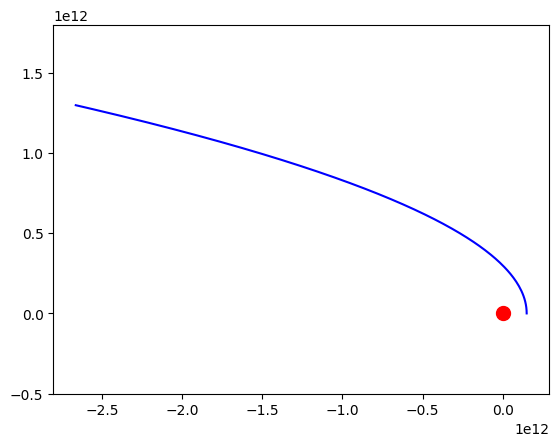

In [3]:
G, M=6.67e-11, 2e30
r0 = 1.5e11 #unit m, distance from the Earth to the Sun
v0 = 0  #initial speed = 0
t0 = 0  #initial angle is 0
w0 = np.sqrt(2*G*M/r0**3) #T+V=0时的角速度
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 20*np.pi/w0, 500)
r = odeint(f, y0, t, args=(G, M))

x = r[:,0]*np.cos(r[:,2]) 
y = r[:,0]*np.sin(r[:,2])
%matplotlib inline
plt.plot(x, y, 'b', label='T+V=0')
#plt.plot(x, -y, 'b') #lower half of the curve
plt.scatter(0,0,s=100, c='r') #where M0 is
axis = plt.axis('equal')

In [4]:
%matplotlib qt5
T = (r[:,1]**2+r[:,0]**2*r[:,3]**2)/2
G, M=6.67e-11, 2e30
V = -G*M/r[:,0]
plt.plot(T+V)

2024-05-23 22:15:42.859 Python[3133:44571] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


取角速度初值$\omega_0<\dot{\theta}_{T+V=0}$时, 如
$$\omega_0 = 0.6\dot{\theta}_{T+V=0}=0.6\sqrt{2GM/r^3},$$ 
此时角速度变小，动能减小，即$T+V<0$.
此时轨迹是椭圆

In [5]:
r0 = 1.5e11 #unit m, distance from the Earth to the Sun
v0 = 0  #initial speed = 0
t0 = 0  #initial angle is 0
w0 = np.sqrt(2*G*M/r0**3)*0.6 #T+V<0时的角速度
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 20*np.pi/w0, 500)
r = odeint(f, y0, t, args=(G, M))

x = r[:,0]*np.cos(r[:,2]) 
y = r[:,0]*np.sin(r[:,2])
plt.plot(x, y, 'b', label='T+V<0')
plt.scatter(0,0,s=100, c='r') #where M0 is
axis = plt.axis('equal')
plt.legend()

做动画显示

In [7]:
%matplotlib qt5
from matplotlib import animation

plt.close('all')
fig = plt.figure('animation')
plt.axis(axis) #坐标轴范围

plt.scatter(0,0,s=1000, c='r')
myline2, = plt.plot([],[], 'k')
mypoint, = plt.plot([],[], 'bo',ms=20)
def animate(i):
    mypoint.set_data(x[i], y[i]) #质点的位置
    myline2.set_data(x[:i], y[:i]) #质点的运动轨迹
    return mypoint,  myline2

anim=animation.FuncAnimation(fig,animate,frames=len(x), interval=10)

/var/folders/bn/4nh116r95rv96pshg257bzcr0000gn/T/ipykernel_3133/2824917826.py:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  mypoint.set_data(x[i], y[i]) #质点的位置


In [26]:
%matplotlib inline

圆周运动公式
$$mr\omega_0^2=GMm/r^2$$

取 $$\omega_0 =\sqrt{GM/r^3},$$ 轨迹是圆

In [8]:
r0 = 1.5e11 #unit m, distance from the Earth to the Sun
v0 = 0  #initial speed = 0
t0 = 0  #initial angle is 0
w0 = np.sqrt(G*M/r0**3) #T+V<0时的角速度
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 20*np.pi/w0, 500)
r = odeint(f, y0, t, args=(G, M))

x = r[:,0]*np.cos(r[:,2]) 
y = r[:,0]*np.sin(r[:,2])
plt.plot(x, y, 'b', label='T+V<0')
plt.plot(x, -y, 'b') #lower half of the curve
plt.scatter(0,0,s=100, c='r') #where M0 is
axis = plt.axis('equal')

(2) 当质点总能量小于0且保持不变时，改变角动量的大小，画出质点相应的运动轨迹

取当$\dot{r}=0, r=r_0=1.5e11, \omega_0=\sqrt{GM/r_0^3}$时的系统总能量
$E=\frac{1}{2}mr_0^2\omega_0^2-\frac{GMm}{r_0}=-\frac{GMm}{2r_0}$, 
当$r_0$不变时, $E$不变.

质点的角动量为$L=mr^2\omega$, 改变$\omega$，则角动量改变.

系统的总能量守恒，有
$$\frac{1}{2}mr^2\dot{\theta}^2-\frac{GMm}{r}=-\frac{GMm}{2r_0}$$
约掉$m$, 化简得，
$$\frac{1}{2}r^2\dot{\theta}^2-\frac{GM}{r}=-\frac{GM}{2r_0}$$

令$E_0 = -\frac{GM}{2r_0}$

In [13]:
G =  6.67e-11 #m^3/kg/s^2
M =  2e30 #kg weight of the Sun
r0 = 1.5e11 #m, distance from Earth to Sun
E0 = -G*M/2/r0 #The Total energy of the system

当$r=r_0$时,
由
$$\frac{1}{2}r^2\dot{\theta}^2-\frac{GM}{r}=-\frac{GM}{2r_0}$$
得到
$$\dot{\theta}=\sqrt{GM/r_0^3}$$

In [14]:
#圆轨道
v0 = 0
t0 = 0
w0 = np.sqrt(G*M/r0**3) #圆轨道
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 20*np.pi/w0, 500)
r = odeint(f, y0, t, args=(G, M))
x = r[:,0]*np.cos(r[:,2])
y = r[:,0]*np.sin(r[:,2])
plt.scatter(0,0,s=300, c='r')
plt.plot(x, y, 'b', label='{:5.1e}'.format(r0*w0**2))
axis = plt.axis('equal')

取$r=\frac{r_0}{2}$, 
由
$$\frac{1}{2}r^2\dot{\theta}^2-\frac{GM}{r}=-\frac{GM}{2r_0}$$
得到
$$\dot{\theta}=\sqrt{\frac{2(E_0+\frac{GM}{r_0/2})}{(r_0/2)^2}}$$

In [11]:
r0 = 1.5e11/2
w0 = np.sqrt(2/r0**2*(E0+G*M/r0))
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 20*np.pi/w0, 500)
r = odeint(f, y0, t, args=(G, M))
x = r[:,0]*np.cos(r[:,2])
y = r[:,0]*np.sin(r[:,2])
plt.scatter(0,0,s=300, c='r')
plt.plot(x, y, 'g', label='{:5.1e}'.format(r0*w0**2))
axis = plt.axis('equal')

取$r=1.4r_0$, 
由
$$\frac{1}{2}r^2\dot{\theta}^2-\frac{GM}{r}=-\frac{GM}{2r_0}$$
得到
$$\dot{\theta}=\sqrt{\frac{2(E_0+\frac{GM}{1.4r_0})}{(1.4r_0)^2}}$$

In [12]:
r0 = 1.4*1.5e11
w0 = np.sqrt(2/r0**2*(E0+G*M/r0))
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 20*np.pi/w0, 500)
r = odeint(f, y0, t, args=(G, M))
x = r[:,0]*np.cos(r[:,2])
y = r[:,0]*np.sin(r[:,2])
plt.scatter(0,0,s=300, c='r')
plt.plot(x, y, 'g', label='{:5.1e}'.format(r0*w0**2))
axis = plt.axis('equal')

## 第二题

研究平方反比斥力场中的运动。以$\alpha$粒子在重核场中的运动为例，设重核位于力心且固定不动，
$\alpha$粒子的质量为$m$, 它到重核的距离为$r$, 所受库伦斥力为$F=k/r^2$, $k$为库伦定律确定的常量。要求：

(1) 画出$\alpha$粒子在不同初始条件下的轨道，通过改变初始条件研究影响散射角的因素。

(2) 学习根据解决问题的需要来选择坐标系，本题选择直角坐标系。

解: 与引力相似，斥力场中的运动的微分方程为：

$$\left\{\begin{align}
        &\frac{d^2r}{dt^2}= r\big(\frac{dr}{dt}\big)^2+\frac{k}{r^2}\\
        &\frac{d^2\theta}{dt^2} = -\frac{2}{r}\frac{dr}{dt}\frac{d\theta}{dt}\\
        \end{align}
        \right.$$
令$y_0=r, y_1 = \frac{dr}{dt}, y_2=\theta, y_3=\frac{d\theta}{dt}$

上面的高阶常微分方程组化为：
$$\left\{\begin{align}
&y_1 = \frac{dr}{dt}\\
&\frac{dy_1}{dt}=r\big(\frac{dr}{dt}\big)^2+\frac{k}{r^2}\\
&y_3 = \frac{d\theta}{dt}\\
&\frac{dy_3}{dt}=-\frac{2}{r}\frac{dr}{dt}\frac{d\theta}{dt}
\end{align}\right.$$

In [16]:
#定义常微分方程组
def f(y, t, k):
    #G 引力常数，m0力心质量
    return [y[1], y[0]*y[3]**2+k/y[0]**2, y[3], -2*y[1]*y[3]/y[0]]

In [17]:
k = 1 
r0 = 2 #初始位置
v0 = -5 #初始速度
t0 = 10/180*np.pi #初始角度
w0 = 0 #初始角速度
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 1, 500)
r = odeint(f, y0, t, args=(k,))
x = r[:,0]*np.cos(r[:,2])
y = r[:,0]*np.sin(r[:,2])
plt.scatter(0,0,s=100, c='r')
plt.plot(x, y)
axis = plt.axis('equal')

也可以采样直角坐标系，则拉格朗日方程为：

$$L=T-V=\frac{1}{2}m(\dot{x}^2+\dot{y}^2) - \frac{mk}{\sqrt{x^2+y^2}}$$

所以有
$$\frac{\partial L}{\partial \dot{x}}=m\dot{x}, 
\frac{d}{dt}\frac{\partial L}{\partial \dot{x}}=m\ddot{x}$$
$$\frac{\partial L}{\partial x} = \frac{xmk}{(x^2+y^2)^{3/2}}$$

$x$方向上的常微分方程为：
$$\ddot{x}=\frac{xk}{(x^2+y^2)^{3/2}}$$
同理，可得$y$方向上的常微分方程为：
$$\ddot{y}=\frac{yk}{(x^2+y^2)^{3/2}}$$

得到常微分方程组：
$$\left\{\begin{align}
        &\frac{d^2x}{dt^2}= \frac{xk}{(x^2+y^2)^{3/2}}\\
        &\frac{d^2y}{dt^2} = \frac{yk}{(x^2+y^2)^{3/2}}\\
        \end{align}
        \right.$$
令$y_0=x, y_1 = \frac{dx}{dt}, y_2=y, y_3=\frac{dy}{dt}$

In [18]:
def f(y, t, k):
    '''定义常微分方程组'''
    return [y[1], k*y[0]/(y[0]**2+y[2]**2)**(1.5), 
            y[3], k*y[2]/(y[0]**2+y[2]**2)**(1.5)]

In [19]:
k = 1 #假设常数k
y0=[0.1,0,-1,1] #初始条件
t = np.linspace(0, 2, 500)
res = odeint(f, y0, t, args=(k,))
x = res[:,0]
y = res[:,2]
plt.scatter(0,0,s=100,c='r') #质心位置
plt.plot(x,y)
axis = plt.axis('equal')

做动画

In [20]:
%matplotlib qt5
plt.close('all')
fig = plt.figure('animation')
plt.axis(axis) #坐标轴范围
from matplotlib import animation
plt.scatter(0,0,s=100, c='r')
myline2, = plt.plot([],[], 'k')
mypoint, = plt.plot([],[], 'bo',ms=10)
def animate(i):
    mypoint.set_data(x[i], y[i]) #摆锤的位置
    myline2.set_data(x[:i], y[:i]) #运动轨迹
    return mypoint,  myline2

anim=animation.FuncAnimation(fig,animate,frames=len(x), interval=10)

/var/folders/bn/4nh116r95rv96pshg257bzcr0000gn/T/ipykernel_3133/3542454778.py:10: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  mypoint.set_data(x[i], y[i]) #摆锤的位置


## 第3题
研究水星近日点的进动. 由于广义相对论对万有引力定律的修正, 引起水星运动轨道的进动, 水星的空间轨道不再是闭合的椭圆轨道. 广义相对论对万有引力的修正可以归结为在原来的运动方程中增加一个小的修正项$\varepsilon/r^4$,其中$\varepsilon=3Gm_0mh^2/c^2$是小量, $G$是万有引力常量, $m_0$为太阳质量, $m$为水星质量, $c$为真空中的光速, $h$为水星掠面速度的两倍. 要求:

画出水星运动轨道. 验证只有质点在有心力场中所受的力与平方反比引力有微小偏离, 其轨道就不是闭合椭圆, 从而证明广义相对论对万有引力定律的修正将引起椭圆轨道进动.

水星近日点的进动
$$\left\{\begin{align}
        &\frac{d^2r}{dt^2}= r\big(\frac{dr}{dt}\big)^2-\frac{GM}{r^2}(1+\varepsilon/r^2)\\
        &\frac{d^2\theta}{dt^2} = -\frac{2}{r}\frac{dr}{dt}\frac{d\theta}{dt}\\
        \end{align}
        \right.$$
令$y_0=r, y_1 = \frac{dr}{dt}, y_2=\theta, y_3=\frac{d\theta}{dt}$
可以参考http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node116.html

In [21]:
def f(y, t, G, m0, epsilon):
    '''定义常微分方程'''
    return [y[1], y[0]*y[3]**2 - 
            G*m0/y[0]**2 * (1+epsilon/y[0]**2), 
            y[3], -2*y[1]*y[3]/y[0]]

G =  6.67e-11 #m^3/kg/s^2
m0 =  2e30 #kg
epsilon = 0.2e21
r0 = 1.5e11 #m
v0 = 0
t0 = 0
w0 = np.sqrt(G*m0/r0**3)*0.8
y0 = [r0, v0, t0, w0]
t = np.linspace(0, 50*np.pi/w0, 1000)
r = odeint(f, y0, t, args=(G, m0, epsilon))

x = r[:,0]*np.cos(r[:,2])
y = r[:,0]*np.sin(r[:,2])
fig = plt.figure('0')
plt.plot(x, y, 'b')
plt.scatter(0,0,s=100, c='r')
axis = plt.axis('equal')

做动画

In [22]:
from matplotlib import animation

plt.close('all')
fig = plt.figure('animation')
plt.axis(axis) #坐标轴范围

plt.scatter(0,0,s=100, c='r')
myline2, = plt.plot([],[], 'k')
mypoint, = plt.plot([],[], 'ro',ms=10)
def animate(i):
    mypoint.set_data(x[i], y[i]) #摆锤的位置
    myline2.set_data(x[:i], y[:i]) #运动轨迹
    return mypoint,  myline2

anim=animation.FuncAnimation(fig,animate,frames=len(x), interval=10)

/var/folders/bn/4nh116r95rv96pshg257bzcr0000gn/T/ipykernel_3133/3338310236.py:11: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  mypoint.set_data(x[i], y[i]) #摆锤的位置


In [23]:
import numpy as np, matplotlib.pyplot as plt
L=20
xx = np.arange(-30,L-30+dt,dt)
yy = np.sin(20*np.pi/L*xx) #弹簧
plt.plot(yy,xx,'k',lw=4)
plt.axis('off')

NameError: name 'dt' is not defined

/var/folders/bn/4nh116r95rv96pshg257bzcr0000gn/T/ipykernel_3133/3338310236.py:11: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  mypoint.set_data(x[i], y[i]) #摆锤的位置


## 第四题

小球与弹簧的碰撞. 本题练习事件函数events的应用.

如图所示, 地面上有垂直放置的弹簧, 弹簧上端固定有一个木块. 有一个小球从空中自由下落, 与木块发生弹性碰撞. 设小球及木块均只沿垂直方向运动, 木块保持平动且顶面与地面平行，研究小球与木块运动. 小球质量为$m_1$, 木块质量为$m_2$. 弹簧劲度系数为$k$。 要求画出小球和木块的位移曲线并模拟两物体的运动状况. 计算时，小球与弹簧发生碰撞时刻由events来判断, 此时小球离地面的高度与弹簧的高度相等，由于碰撞过程十分短暂, 可以忽略碰撞过程中二者高度的变化, 认为二者遵循动量守恒、机械能守恒. 在其他的时间, 小球与弹簧运动的微分方程遵循牛顿定律.

<img src="ringball-5-28.png" width=200>

将弹簧水平固定好，让在桌面上作水平运动的小球与它碰撞，重新研究小球与弹簧的运动.

### 解：

小球与弹簧的碰撞，以弹簧自然伸直上方的端点作为原点，$y$轴竖直向上，以$y_1, y_2$分别代表小球和木块的位置，
小球质量为$m_1$, 木块质量为$m_2$, 弹簧劲度系数为$k$, 根据牛顿定律或者拉格朗日方程，得到无碰撞时小球和木块的运动微分方程为：
$$\left.\begin{align}
         &m_1 \frac{d^2y_1}{dt^2} = -m_1 g\\
         &m_2 \frac{d^2y_2}{dt^2} = -m_2 g - ky_2
         \end{align}\right\}$$

小球和木块碰撞的条件为$y_1 = y_2$, 弹性碰撞的条件是动量守恒，机械能守恒，因为碰撞事件很短，所以忽略高度的变化，在碰撞过程中有
$$\left.\begin{align}m_1v_1+m_2v_2 = m_1v_1'+m_2v_2'\\
\frac{1}{2}m_1v_1^2+\frac{1}{2}m_2v_2^2 = \frac{1}{2}m_1v_1'^2+\frac{1}{2}m_2v_2'^2
\end{align}\right\}$$

当$y_1 = y_2$时，解上面方程组，求出两物体碰撞后的速度$v_1', v_2'$, 反复求解。

In [ ]:
def f(t, y, k, m2):
    return [y[1], -9.8, y[3], -9.8-k/m2*y[2]]

from scipy.integrate import ode
import numpy as np, matplotlib.pyplot as plt
h0, m1, k, m2 = 50, 20, 60, 50 #小球的高度，质量，弹簧劲度系数，木块的质量
t0, tfinal = 0, 100        #解微分方程的起止事件
dt = 0.001
y0 = [h0, 0, 0, 0]             #初始条件
x = []
y = []
r = ode(f).set_integrator('zvode')
r.set_initial_value(y0, t0).set_f_params(k, m2)

while r.successful() and r.t < tfinal:
    r.integrate(r.t+dt)
    if np.abs(r.y[0].real - r.y[2].real) < .1:
        #print(r.t, r.y[0].real, r.y[2].real)
        y0[0], y0[2] = r.y[0].real, r.y[2].real
        v10, v20 = r.y[1].real, r.y[3].real
        y0[1] = (-m2*v10+2*m2*v20+m1*v10)/(m1+m2)
        y0[3] = (2*m1*v10 + m2*v20-m1*v20)/(m1+m2)
        #print(y0, t0)
        t0 = r.t
        r.set_initial_value(y0, t0)
    x.append(r.t)
    y.append([r.y[0].real, r.y[1].real, r.y[2].real, r.y[3].real])

In [26]:
%matplotlib qt5
x = np.array(x)
y = np.array(y)
n = len(x)
plt.plot(x[:n], y[:n,0])
plt.plot(x[:n], y[:n,2])
t=np.zeros(x.size)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
%matplotlib qt5
x = np.array(x)
y = np.array(y)
from matplotlib import animation
fig = plt.figure()
plt.axis([-10, 10, -30, 60])
#myline1, = plt.plot([],[],'g-',lw=2)
mypoint1, = plt.plot([],[], 'go',ms=20) #小球
myline2, = plt.plot([],[],'olive',lw=2) #弹簧
mypoint2, = plt.plot([],[], 'b_',ms=40) 
def animate(j):
    i=j*100
    mypoint1.set_data(t[i], y[i,0])
    #myline1.set_data(t[:i], y[:i,0])
    mypoint2.set_data(t[i], y[i,2])
    L=y[i,2]+30 #弹簧长度
    dt = 0.01
    xx = np.arange(-30,L-30+dt,dt)
    yy = np.sin(20*np.pi/L*xx) #弹簧
    myline2.set_data(yy,xx)
    return mypoint1, myline1, mypoint2, myline2

anim=animation.FuncAnimation(fig,animate,frames=len(x)//100, interval=1)

## 第五题
5. 三质点系统的微振动。研究两个弹簧连接的3质点组成的一维振动系统的运动。如图5.29所示，其中弹簧的进度系数均为k,中间的质点的质量为$m_0$,两端质点的质量都为$m$, 要求

<img src="三质点耦合振动系统.png"  alt="三质点耦合振动系统" width="300"/>

设$t=0$的时刻，质点的初速度为0，但是初位移不为0.由拉格朗日方程，得系统的运动微分方程为
$$\left\{\begin{aligned}
         &m\frac{d^2x_1}{dt^2}+kx_1-kx_2=0\\
         &m_0\frac{d^2x_2}{dt^2}-kx_1+2kx_2-kx_3=0\\
         &m\frac{d^2x_3}{dt^2}-kx_2+kx_3=0
         \end{aligned}\right.$$

（1）用三种不同的方法，即矩阵方法，快速傅里叶变换法和拉普拉斯变换法，分别求振动系统的简正频率。从而证明这三种方法所得的结果是相同的。本题将这三种方法放在一起，通过对比，读者可以了解他们之间的内在联系。

#### 1.1 矩阵方法
将微分方程组写成矩阵的形式

$S=\begin{bmatrix} m&0&0\\0&m_0&0\\0&0&m\\ \end{bmatrix}$,
$K=\begin{bmatrix} k&-k&0\\-k&2k&-k\\0&-k&k\\ \end{bmatrix}$,
$X=\begin{bmatrix} x_1\\x_2\\x_3\\ \end{bmatrix}$

方程化为

$S\ddot{X}=-KX$

取$m=3 kg, m_0=4 kg, k=50 N m^{-1}$

In [5]:
from sympy import *
init_printing(use_unicode=True)
m,m0,k=symbols('m, m0, k')
S = Matrix([[m, 0, 0], [0, m0, 0], [0, 0, m]])#质量矩阵
K = Matrix([[k, -k, 0], [-k, 2*k, -k], [0, -k, k]]) #系数矩阵
T = S.inv()*K #求S的逆乘以K
vals = T.eigenvals()
for each in vals:
    print('本征频率为：', sqrt(each), ': ', sqrt(each).evalf(subs ={'m':3, 'm0':4,'k':50}))

本征频率为： sqrt(k/m) :  4.08248290463863
本征频率为： sqrt((2*k*m + k*m0)/(m*m0)) :  6.45497224367903
本征频率为： 0 :  0


In [6]:
from sympy.abc import x
f = Function('f')

psi1 = dsolve(f(x).diff(x,2)+k/m*f(x))
psi2 = dsolve(f(x).diff(x,2))
psi3 = dsolve(f(x).diff(x,2)+k*(2*m+m0)/m/m0*f(x))
print('本征函数为：', psi1, psi2, psi3)

本征函数为： Eq(f(x), C1*exp(-x*sqrt(-k/m)) + C2*exp(x*sqrt(-k/m))) Eq(f(x), C1 + C2*x) Eq(f(x), C1*exp(-x*sqrt(k*(-2/m0 - 1/m))) + C2*exp(x*sqrt(k*(-2/m0 - 1/m))))


#### 1.2. 用数值解法解这个常微分方程组，
初值为：$x_1(0)=-0.4m, x_2(0)=0.0m, x_3(0)=0.3m, x'_1(0) = x'_2(0)=x'_3(0)=0$

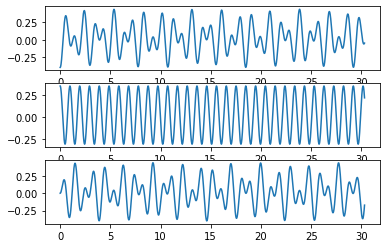

In [9]:
def f(y,t,k=50,m=3,m0=4):
    return [y[1], -k/m*(y[0]-y[2]),y[3], k/m0*(y[0]-2*y[2]+y[4]),y[5],k/m*(y[2]-y[4])]
t = np.ogrid[0:30.33:0.01]
from scipy.integrate import odeint
y0=[-0.4,0.0,0.35,0,0,0]
res = odeint(f,y0,t)
plt.close('all')
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(t, res[:,i*2])

加上弹簧平衡位置处于[0.8, 0, 0.8], 求出的$x_1, x_2, x_3$是偏离平衡位置的大小，所以有

In [10]:
#动画
%matplotlib qt5
from matplotlib import animation
fig = plt.figure()
plt.axis([-1.5, 1.5, -.5, .5])
mypoint1, = plt.plot([],[], 'ks',ms=40)
mypoint2, = plt.plot([],[], 'ks',ms=50)
mypoint3, = plt.plot([],[], 'ks',ms=40)
myline1, = plt.plot([],[],'k')
myline2, = plt.plot([],[],'k')
points = [mypoint1, mypoint2, mypoint3]
x = [res[:,0]-.9, res[:,2], res[:,4]+.9]
y = np.zeros(t.size)
def spring(x0,L):
    #L 弹簧长度
    dt = L/100
    xx = np.linspace(x0,L+x0,500)
    yy = 0.01*np.sin(60*np.pi/L*(xx-x0)) #弹簧
    return (xx,yy)
def animate(i):
    for k in range(3):
        xx,yy = spring(x[0][i],x[1][i]-x[0][i])
        myline1.set_data(xx,yy)
        xx,yy = spring(x[1][i],x[2][i]-x[1][i])
        myline2.set_data(xx,yy)        
        points[k].set_data(x[k][i],y[i])
    return points

anim=animation.FuncAnimation(fig,animate,frames=len(t), interval=100)

#### 1.3. 用快速傅里叶变换求周期

In [25]:
from scipy.fftpack import fft, fftshift
freq = np.pi*2*np.arange(t.size)/((t.size-1)*0.01)
plt.close('all')
for i in range(3):
    plt.subplot(3,1,i+1)
    f1 = fft(res[:,2*i])/t.size
    plt.plot(freq[:100],np.abs(f1)[:100])

（2）将拉普拉斯变换法得出的系统的运动微分方程的解析解做成动画模拟。

$$\left\{\begin{aligned}
         &m\frac{d^2x_1}{dt^2}+kx_1-kx_2=0\\
         &m_0\frac{d^2x_2}{dt^2}-kx_1+2kx_2-kx_3=0\\
         &m\frac{d^2x_3}{dt^2}-kx_2+kx_3=0
         \end{aligned}\right.$$
初值为：$x_1(0)=-0.4m, x_2(0)=0.0m, x_3(0)=0.3m, x'_1(0) = x'_2(0)=x'_3(0)=0$

$f(t)$的拉普拉斯变换为
$$F(p)=\int_0^{\infty}f(t)e^{-pt}dt,$$

假设$x_i(t)$的拉普拉斯变换为$X_i(p), (i=1,2,3)$, 则$x''_i(t)$的拉普拉斯变换为$p^2X_i(p)-px_i(0)-x'_i(0)$
方程组化为
$$
\begin{cases}
m(p^2X_1(p)-px_1(0))+kX_1(p)-kX_2(p)=0\\
m_0(p^2X_2(p)-px_2(0))-kX_1(p)+2kX_2(p)-kX_3(p)=0\\
m(p^2X_3(p)-px_3(0))-kX_2(p)+kX_3(p)=0\\
\end{cases}
$$
整理方程
\begin{cases}
(mp^2+k)X_1(p)-kX_2(p)=mpx_1(0)\\
-kX_1(p)+(m_0p^2+2k)X_2(p)-kX_3(p)=m_0px_2(0)\\
-kX_2(p)+(mp^2+k)X_3(p)=mpx_3(0)\\
\end{cases}

方程组可以表示为
$$\begin{pmatrix}
mp^2+k&-k&0\\
-k&m_0p^2+2k&-k\\
0&-k&mp^2+k\\
\end{pmatrix}
\begin{pmatrix}
X_1(p)\\
X_2(p)\\
X_3(p)
\end{pmatrix}=\begin{pmatrix}
mpx_1(0)\\
m_0px_2(0)\\
mpx_3(0)
\end{pmatrix}$$

（3）学习快速傅里叶变换法和拉普拉斯变换法的用法

### 第6题
推导本章中陀螺的运动微分方程组和变换关系. 对不同的初始条件同时画出描述陀螺的章动角、进动角和自传角的位移, 速度和加速度随时间演变图形.

### 第13题
计算有限深方势阱内能级, 并与量子力学教材中的解析解对比.

### 第14题
用指令bvp计算简谐振子的最低的两个能级.

### 5.10.3 一维定态薛定谔方程的定态解

In [34]:
def V(x): #定义势阱函数
    #return -10*np.ones(x.size)
	return x*x*0.5-1

def f(y, x, e1):#定义微分方程组
	return (y[1], 50**2*(-e1+V(x))*y[0])

def TurningPoint(e,x):
    """计算matching Point, 一般选择势能和动能相等的点"""
    q = 2*(e-V(x))
    for i in range(q.size-1):
        if q[i]*q[i+1]<0 and q[i]>0:
            return x[i]

[-0.9858578772267135, -0.957574531870769, -0.929289327337932, -0.901005751503769]


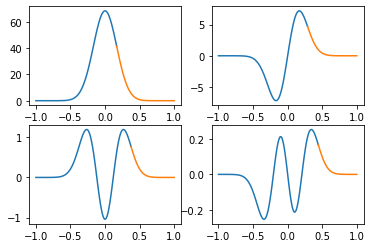

In [36]:
x = np.linspace(-1,1,501) #为求接合点设置x数组
n = 4  #求4个能级
eold = -1  #初始搜寻能级
olddpsi =  0.5 #转折点初始一阶导数
tol = 1e-6
e = [] #记录本征值
for k in range(1,n+1):
	de = 2 * tol
	e1 = eold + abs(eold)/100 #能级搜索
	kk = (-1)**(k+1)*0.0001  #导数初值
	while abs(de) > tol:
		xturn = TurningPoint(e1,x)  #选择matching point: E=V(x)的点
		xl = np.linspace(-1, xturn, 100)  #从左向右的x
		xr = np.linspace(1, xturn, 100)   #从右向左的x
		ul = odeint(f, [0, kk], xl, args=(e1,))  #从左向右积分
		ur = odeint(f, [0, -0.0001], xr, args=(e1,))   #从右向左积分
		dpsi = ul[-1,1] - ur[-1,1]    #使波函数的一阶导数连续, 波函数的连续性通过在转折点的调整来实现
		de = -dpsi*de/(dpsi-olddpsi)
		olddpsi, eold = dpsi,e1
		e1 = e1 + de
	e.append(eold)
	plt.subplot(2,2,k)
	plt.plot(xl, ul[:,0], xr, ur[:,0])
print(e)